In [2]:
import tensorflow as tf
import PIL
import numpy as np

In [12]:
from PIL import Image
from scipy import ndimage
import scipy
import matplotlib.pyplot as plt

In [3]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [44]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [45]:
cat_image_id = os.listdir('images/cat')[0]

cat_image = load_image(os.path.join('images/cat',cat_image_id))

print(f'shape: {cat_image.shape}')
print(f'type: {type(cat_image)}')

predicted_result = model.predict(cat_image)

print(predicted_result.shape)

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>
(1, 1000)


(380, 760, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


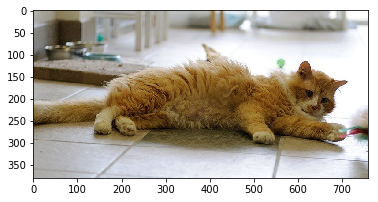

In [46]:
my_image = "0b1bb2a5d4.jpg" # change this to the name of your image file 

fname = "images/cat/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

plt.imshow(image)
print(image.shape)

In [47]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [48]:
predicted_result = model.predict(cat_image)
print(predicted_result.shape)

(1, 1024)


In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)

x = Dropout(rate=0.4)(model.output)
x = Dense(3)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [50]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [51]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [72]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy'
)

In [73]:
from tensorflow.keras.applications import mobilenet as _mobilenet

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    './images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    './images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 607 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


In [75]:
from keras_tqdm import TQDMNotebookCallback

# keras, model definition...
#cb = TQDMNotebookCallback()
#setattr(TQDMNotebookCallback(),'on_train_batch_begin',lambda x,y:None)
#setattr(TQDMNotebookCallback(),'on_train_batch_end',lambda x,y:None)

batch_size = 32

history = model.fit_generator(
    generator=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=3,
    callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)],
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/3


AttributeError: 'TQDMNotebookCallback' object has no attribute 'on_train_batch_begin'

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()